# Model selection & comparison

_Alex Malz (LINCC@CMU)_
_LSSTC Data Science Fellowship Program_

In [1]:
# from astropy import cosmology as apcosmo
# from astropy import constants as apconst
from chainconsumer import ChainConsumer
import numpy as np
import os
# import scipy.stats as sps

In [11]:
import matplotlib as mpl
import matplotlib.pyplot as plt

import pylab as mplot
%pylab inline

mplot.rc('xtick', labelsize=16) 
mplot.rc('ytick', labelsize=16) 

Color = ['#404096','#57A3AD','#D92120']#,'#DEA73A']

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


## Data

Let's take a close look at the procedure of [Chang+18](https://doi.org/10.1093/mnras/sty2902), in which the data from four completed weak lensing surveys were reanalyzed under common assumptions.

We have the MCMC chains resulting from fits to the data of each survey under their published priors and under shared priors.
Let's isolate the values of $S_{8}$ and $\Omega_{m}$, even though all versions of the analysis fit additional parameters beyond those.

In [3]:
def get_s8(omegam, sigma8):
    return sigma8*np.sqrt(omegam/0.3)

Text(1, 1.15, 'KiDS-450')

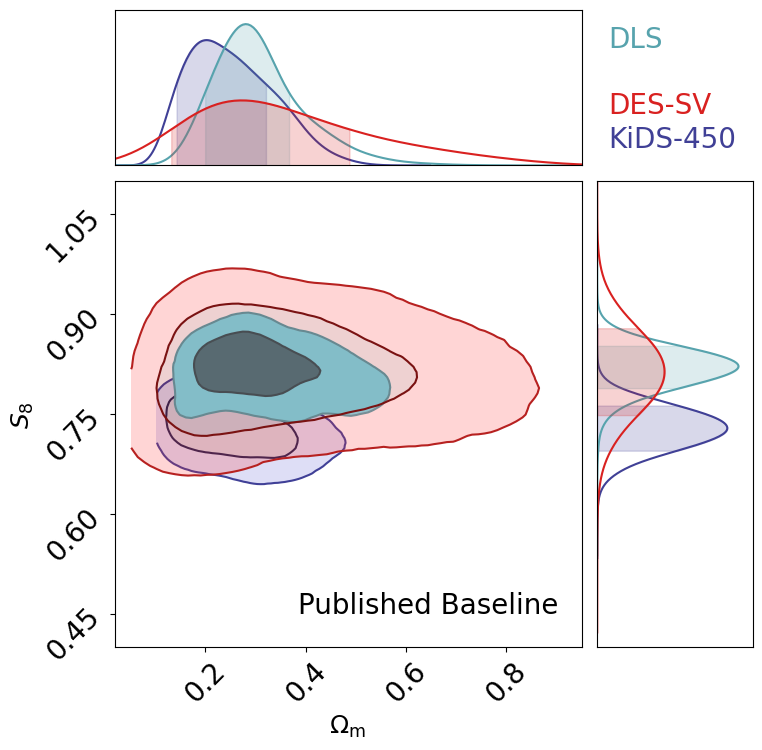

In [18]:
# cfhtlens_paper = 'data/official/CFHTLenS/fiducialrun'#'../old/cfhtlens/paper/fiducialrun'
kids_paper = 'data/official/KiDS450/kids450dir'#'../old/kids/paper/kids450dir/kids450dir'
des_paper = 'data/official/DES/dessv_chain_reduced_v2.txt'#'../old/dessv/paper/dessv_chain_reduced_v2.txt'
dls_paper = 'data/official/DLS/DLS_chain.txt'#'../old/dls/paper/DLS_chain.txt'

data_params = []
weights = []
file_list = [None,#cfhtlens_paper, 
             kids_paper, des_paper, dls_paper]
probs_pub = []

# Om = np.array([])
# s8 = np.array([])
# ww = np.array([])
# for i in range(8):
#     data = np.loadtxt(file_list[0]+'_'+str(i+1)+'.txt')
#     N = len(data)
#     Om = np.concatenate((Om, data[int(N*0.3):,9]), axis=0)
#     s8 = np.concatenate((s8, data[int(N*0.3):,13]), axis=0)
#     ww = np.concatenate((ww, data[int(N*0.3):,0]), axis=0)
# data_params.append([Om, get_s8(Om, s8)])
# weights.append(ww)

Om = np.array([])
s8 = np.array([])
ww = np.array([])
for i in range(8):
    data = np.loadtxt(file_list[1]+'_'+str(i+1)+'.txt')
    N = len(data)
    Om = np.concatenate((Om, data[int(N*0.3):,10]), axis=0)
    s8 = np.concatenate((s8, data[int(N*0.3):,14]), axis=0)
    ww = np.concatenate((ww, data[int(N*0.3):,0]), axis=0)
data_params.append([Om, get_s8(Om, s8)])
weights.append(ww)

data = np.loadtxt(file_list[2])
os.system("cat "+file_list[2]+" | tail -3 | head -1 | sed s/'='/' '/|awk '{print $2}'>nsample")
nsample = int(np.loadtxt('nsample'))
weights.append(data[-nsample:,14])
data_params.append([data[-nsample:,0], data[-nsample:,3]*(data[-nsample:,0]/0.3)**0.5]) #12

data = np.loadtxt(file_list[3])
N = len(data)
weights.append(data[:,0])
data_params.append([data[:,2], data[:,3]*(data[:,2]/0.3)**0.5]) 

data_params_published = data_params

c = ChainConsumer()
# c.add_chain(data_params[3], weights=weights[3], name='')
c.add_chain(data_params[0], weights=weights[0], name='', parameters=[r"$\Omega_{\rm m}$", r"$S_{8}$"])
c.add_chain(data_params[2], weights=weights[2], name='')
c.add_chain(data_params[1], weights=weights[1], name='')

c.configure(colors=Color, label_font_size=18, contour_label_font_size=20, 
            tick_font_size=20, linewidths=[1.5,1.5,1.5,1.5], sigma2d=False, shade=True, 
            kde=1.5, shade_alpha=[0.2,1,0.2,0.7], bar_shade=True, sigmas=[0,1,2])
fig = c.plotter.plot(extents=[(0.02,0.95),(0.4,1.1)])
mplot.text(-27,0.45,'Published Baseline', color='k', fontsize=20)
fig.set_size_inches(4.5 + fig.get_size_inches())  # Resize fig for doco. You don't need this.

mplot.text(1,1.30,'DLS', color=Color[1], fontsize=20)
# mplot.text(1,1.25,'CFHTLenS', color=Color[0], fontsize=20)
mplot.text(1,1.20,'DES-SV', color=Color[2], fontsize=20)
mplot.text(1,1.15,'KiDS-450', color=Color[0], fontsize=20)

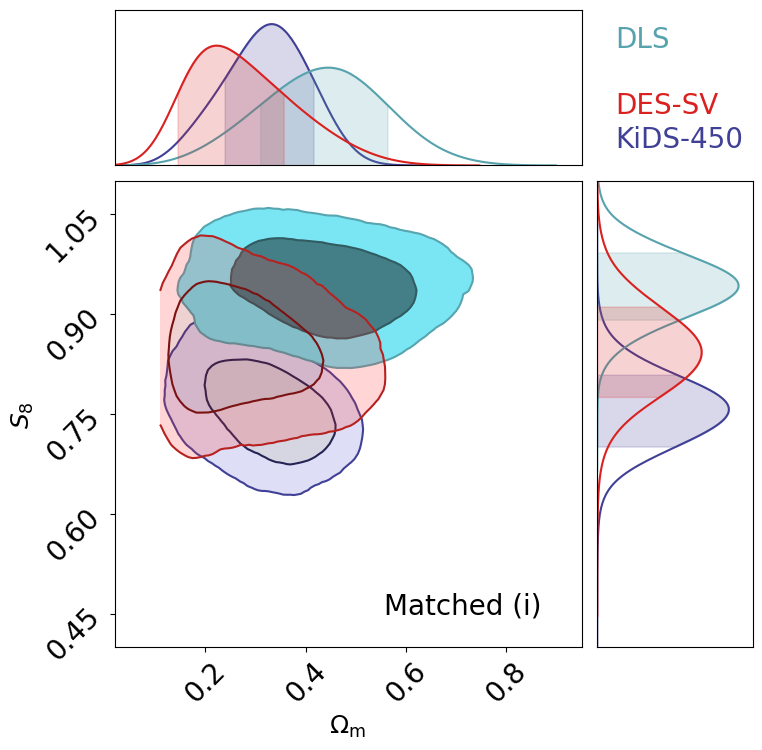

In [17]:
# cfhtlens2_g = 'data/matched/CFHTLenS/mcmc_cfhtlens_matched2_covg.txt'#'../cosmosis_output_finalfinal/mcmc_cfhtlens_matched2_covg.txt'
kids2_g = 'data/matched/KiDS450/mcmc_kids_matched2_covg.txt'#'../cosmosis_output_finalfinal/mcmc_kids_matched2_covg.txt'
des2_g = 'data/matched/DES/mcmc_des_matched2_covg.txt'#'../cosmosis_output_finalfinal/mcmc_des_matched2_covg.txt'
dls2_g = 'data/matched/DLS/mcmc_dls_matched2_covg.txt'#'../cosmosis_output_finalfinal/mcmc_dls_matched2_covg.txt'

data_params = []
weights = []
file_list = [None,#cfhtlens2_g, 
             kids2_g, des2_g, dls2_g]

# data = np.loadtxt(file_list[0])
# os.system("cat "+file_list[0]+" | tail -3 | head -1 | sed s/'='/' '/|awk '{print $2}'>nsample")
# nsample = int(np.loadtxt('nsample'))
# weights.append(data[-nsample:,-1])
# data_params.append([data[-nsample:,21], data[-nsample:,20]*(data[-nsample:,21]/0.3)**0.5]) #12
    
data = np.loadtxt(file_list[1])
os.system("cat "+file_list[1]+" | tail -3 | head -1 | sed s/'='/' '/|awk '{print $2}'>nsample")
nsample = int(np.loadtxt('nsample'))
weights.append(data[-nsample:,-1])
data_params.append([data[-nsample:,15], data[-nsample:,14]*(data[-nsample:,15]/0.3)**0.5]) #12

data = np.loadtxt(file_list[2])
os.system("cat "+file_list[2]+" | tail -3 | head -1 | sed s/'='/' '/|awk '{print $2}'>nsample")
nsample = int(np.loadtxt('nsample'))
weights.append(data[-nsample:,-1])
data_params.append([data[-nsample:,13], data[-nsample:,12]*(data[-nsample:,13]/0.3)**0.5]) #12

data = np.loadtxt(file_list[3])
os.system("cat "+file_list[3]+" | tail -3 | head -1 | sed s/'='/' '/|awk '{print $2}'>nsample")
nsample = int(np.loadtxt('nsample'))
weights.append(data[-nsample:,-1])
data_params.append([data[-nsample:,9], data[-nsample:,8]*(data[-nsample:,9]/0.3)**0.5]) #12

data_params_matched = data_params

c = ChainConsumer()
# c.add_chain(data_params[3], weights=weights[3], parameters=[r"$\Omega_{\rm m}$", r"$S_{8}$"], name='')
c.add_chain(data_params[0], weights=weights[0], name='', parameters=[r"$\Omega_{\rm m}$", r"$S_{8}$"])
c.add_chain(data_params[2], weights=weights[2], name='')
c.add_chain(data_params[1], weights=weights[1], name='')

c.configure(colors=Color, label_font_size=18, contour_label_font_size=20, 
            tick_font_size=20, linewidths=[1.5,1.5,1.5,1.5], sigma2d=False, shade=True, 
            kde=1.5, shade_alpha=[0.2,1,0.2,0.7], bar_shade=True, sigmas=[0,1,2])

fig = c.plotter.plot(extents=[(0.02,0.95),(0.4,1.1)])

mplot.text(1,1.30,'DLS', color=Color[1], fontsize=20)
# mplot.text(1,1.25,'CFHTLenS', color=Color[0], fontsize=20)
mplot.text(1,1.20,'DES-SV', color=Color[2], fontsize=20)
mplot.text(1,1.15,'KiDS-450', color=Color[0], fontsize=20)

mplot.text(-12,0.45,'Matched (i)', color='k', fontsize=20)

fig.set_size_inches(4.5 + fig.get_size_inches())  # Resize fig for doco. You don't need this.

## Bayesian model comparison

The Bayes Factor $BF_{0,1} = \frac{P(x | \Theta_{0})}{P(x | \Theta_{1}} = \frac{\frac{P(\Theta_{0} | x)}{P(\Theta_{1} | x)}}{\frac{P(\Theta_{0})}{P(\Theta_{1})}} = \frac{\int_{\Theta_{0}}f(x|\theta)g_{0}(\theta)d\theta}{\int_{\Theta_{1}}f(x|\theta)g_{1}(\theta)d\theta}$ compares posteriors estimated from the same data.


In the paper, we had posterior samples $p(\theta | data)p(\theta)$, where $data$ differs across surveys and $p(\theta)$ is shared only for the matched case.
How can we calculate the evidence ratio?

### Problem 1a

Calculate the one-dimensional Bayes factor for each survey for $S_{8}$ under the different analysis models.

### Problem 1b

Calculate the two-dimensional Bayes factor for each survey for $\Omega_{m}$ and $S_{8}$ jointly under the different analysis models.

### Problem 1c

Compare the matched-assumption constraints across all the data sets and interpret the results.

### Problem 1d

In the previous part, there are some nuances about whether the Bayes Factor is even applicable.
What's working in its favor, and what assumptions are violated?
How is the interpretation affected?

Answer: 
The assumptions are the same, so the term for the priors drops out, meaning the evidence ratio would be the posterior ratio (which is good because that's what we have in hand).
However, we were also comparing different data, so $p(x | \Theta)$ doesn't have the same thing on the left hand side of the conditional, meaning it wasn't entirely kosher to calculate it across surveys.

## Information-based metrics

It's not strictly Bayesian, but information theory suggests metrics that tell us how well different models constrain parameters.
What could we have done instead?

### Problem 2a

Turn the posterior samples into evaluations of the posterior probability density on a common grid in order to evaluate metrics.
Hint: Use the [`scipy.stats.gaussian_kde`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.gaussian_kde.html) or [`numpy.histogram`](https://numpy.org/doc/stable/reference/generated/numpy.histogram2d.html) functionality (and note that the estimation of the continuous PDF from samples is also a model assumption).

In [19]:
def pdf_from_samples(samples):
    
    return pdf_estimate

### Problem 2b

Consider the entropy $H(X) = -\int p(x) \log[p(x)] dx$, a cousin of the Fisher information.
Calculate and interpret the entropies of the MCMC samples under each combination of data and analysis model.
Hint: You can use the [`scipy.stats.entropy`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.entropy.html) implementation if you'd like.

In [ ]:
def entropy(samples):
    
    return entropy

### Problem 2c

We could also use the conditional entropy $H(X | Y) = -\int p(x, y) \log\left[\frac{p(x, y)}{p(Y)}\right] dx$.


In [ ]:
def cond_entropy()

### Problem 2d

Finally, we can ask how discrepant the different distributions are using the mutual information 
